# Face Mask classifier testing
This notebook has been created in order to measure the face mask classifier performance in terms of quality of predictions. The test is made using a confusion matrix to evaluate the percentage of correct guesses of the model.

In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import os


In [2]:
#import model
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = models.resnet18(pretrained=False)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, 3)
model = model.to(device)
model.load_state_dict(torch.load('../input/trainedmodel/mask_recognition_model.pth', map_location=device))

<All keys matched successfully>

In [3]:
# Import dataset and create Loader
data_dir = "../input/face-mask-detection/Dataset"

data_transforms = transforms.Compose([

        transforms.ToTensor(),
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
    ])

dataset=torchvision.datasets.ImageFolder(data_dir,transform=data_transforms)
print(dataset)

train_set_size = int(len(dataset)*0.1)
test_set_size = len(dataset) - train_set_size

train_dataset, test_dataset = random_split(dataset, [train_set_size, test_set_size])
testloader = DataLoader(test_dataset, 128)




Dataset ImageFolder
    Number of datapoints: 8982
    Root location: ../input/face-mask-detection/Dataset
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )


In [4]:
train_features, train_labels = next(iter(testloader))

In [5]:
print(dataset.classes)

['mask_weared_incorrect', 'with_mask', 'without_mask']


In [6]:
# Make predictions

from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd



y_pred = []
y_true = []

# iterate over test data
for inputs, labels in testloader:
        output = model(inputs.to(device)) # Feed Network

        output = (torch.max(torch.exp(output), 1)[1]).data.cpu().numpy()
        y_pred.extend(output) # Save Prediction
        
        labels = labels.data.cpu().numpy()
        y_true.extend(labels) # Save Truth

<AxesSubplot:>

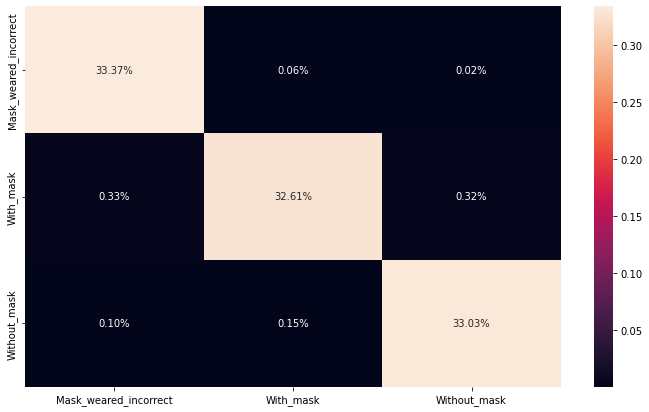

In [7]:
# Plot the confusion matrix

classes = ('Mask_weared_incorrect', 'With_mask', 'Without_mask')

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
df_cm = pd.DataFrame(cf_matrix/np.sum(cf_matrix), index = [i for i in classes],
                     columns = [i for i in classes])
plt.figure(figsize = (12,7))
sn.heatmap(df_cm, annot=True,fmt='.2%')